In [29]:
# Change directory to the desired path
%cd D:\Documents\ai_engineer_pacmann\ai_engineer_pacmann\CANDRA_MLPROCESS\src

import utils
from imblearn.over_sampling import RandomOverSampler


D:\Documents\ai_engineer_pacmann\ai_engineer_pacmann\CANDRA_MLPROCESS\src


c:\Users\lolcandra\miniconda3\envs\mlproces-pacmann\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [30]:
from utils import load_data
from utils import split_input_output
from utils import split_train_test
from utils import serialize_data
from utils import deserialize_data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


In [16]:
%pwd

'D:\\Documents\\ai_engineer_pacmann\\ai_engineer_pacmann\\CANDRA_MLPROCESS\\src'

# Muat data dengan deserialize dari X_train_prep.pkl

In [36]:
# Call the deserialize function to save the dataset into variable

X_train_prep = deserialize_data(path='../data/processed/X_train_prep.pkl')
y_train_prep = deserialize_data(path='../data/processed/y_train_prep.pkl')

In [37]:
print(f"X_train_prep shape: {X_train_prep.shape}")
print(f"y_train_prep shape: {y_train_prep.shape}")

X_train_prep shape: (25968, 23)
y_train_prep shape: (25968,)


In [38]:
X_train_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,home_ownership_MORTGAGERENTOWNOTHER,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,default_onfile_N,default_onfile_Y
15884,25,241875,4.0,16000,7.05,0.07,4,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15138,21,18000,5.0,1500,12.18,0.08,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7474,25,53000,10.0,16000,12.53,0.30,2,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18212,28,16800,4.0,5000,13.98,0.30,8,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6493,25,50000,2.0,10000,7.90,0.20,2,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# RandomOverSampler()

In [39]:
# Membuat instance RandomOverSampler
ros = RandomOverSampler(random_state=42)


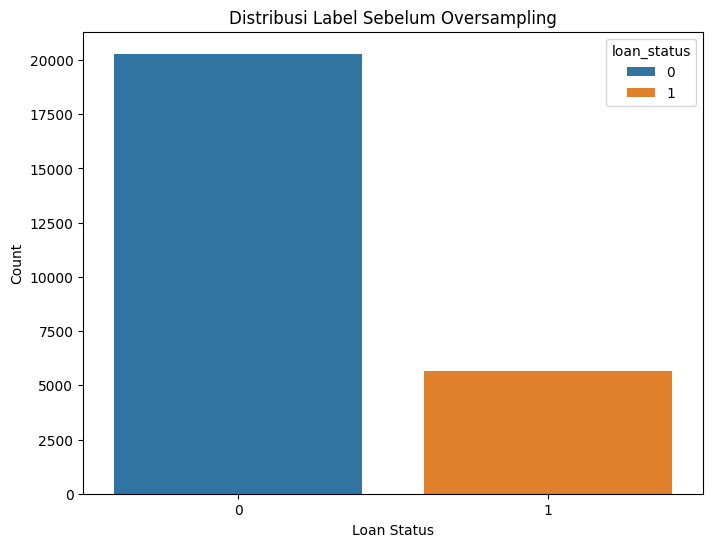

In [40]:
# Mengubah y_train_prep dari Series menjadi DataFrame
y_train_prep_df = pd.DataFrame(y_train_prep, columns=['loan_status'])

# Membuat grafik countplot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=y_train_prep_df, x='loan_status', hue='loan_status')
plt.title("Distribusi Label Sebelum Oversampling")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [41]:
y_train_prep_df.shape

(25968, 1)

# Melakukan OverSampling

In [42]:
from imblearn.over_sampling import RandomOverSampler

# Melakukan oversampling
X_train_ros, y_train_ros = ros.fit_resample(X_train_prep, y_train_prep_df)

# Menampilkan hasil oversampling
print("Sebelum oversampling:")
print(f"X_train_prep shape: {X_train_prep.shape}")
print(f"y_train_prep distribution:\n{y_train_prep_df.value_counts()}")

print("\nSetelah oversampling:")
print(f"X_train_ros shape: {X_train_ros.shape}")
print(f"y_train_ros distribution:\n{y_train_ros.value_counts()}")


Sebelum oversampling:
X_train_prep shape: (25968, 23)
y_train_prep distribution:
loan_status
0              20291
1               5677
Name: count, dtype: int64

Setelah oversampling:
X_train_ros shape: (40582, 23)
y_train_ros distribution:
loan_status
0              20291
1              20291
Name: count, dtype: int64


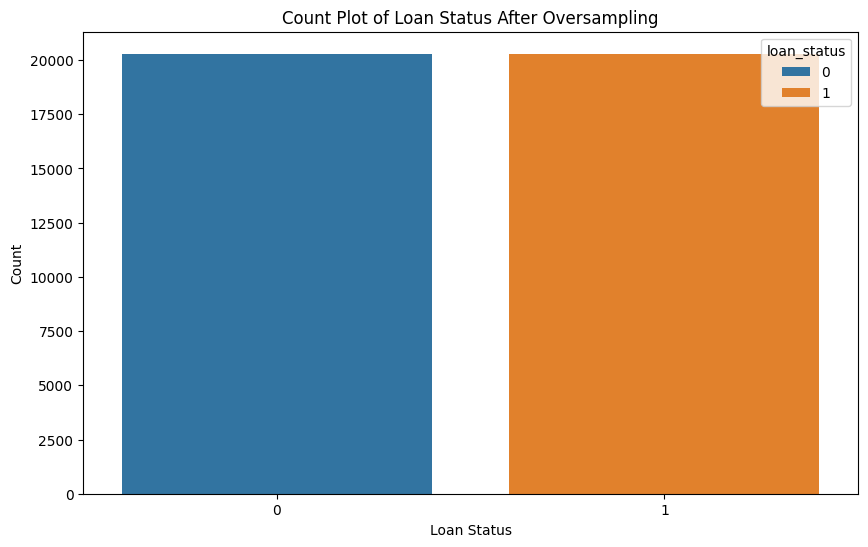

In [46]:
# Plot countplot Setelah dilakukan OverSampling menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=y_train_ros, x='loan_status', hue='loan_status')
plt.title('Count Plot of Loan Status After Oversampling')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [47]:
# Call the serialize function to dump the dataset into .pkl files

serialize_data(data=X_train_ros, path='../data/processed/X_train_ros.pkl')
serialize_data(data=y_train_ros, path='../data/processed/y_train_ros.pkl')

['../data/processed/y_train_ros.pkl']